 # Plot noise mag curve
 For a given noise pdf plot the mode and mag curves

In [14]:
from magD.magD import MagD
from magD.pickle import get_pickle
import numpy as np
import os

import matplotlib.pyplot as plt

# some constants for all plots

# path to local libraries
magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())
# TUCA,HHZ,UW,--,46.51,-118.15,100

resolution = 0.05
num_solutions = 1
nyquist_correction = 0.4
mu = 3e11
qconst = 300.0
beta = 3.5 

data_srcs = {'tuca':
             {
                 'csv_path': 'csv/2019_eew/tuca.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'k',
                 'symbol': '',
                 'size': 0,
                 'label': "",
                 'unit': 'deg',
                 'klass': 'scnl'
             },
             'lno':
             {
                 'csv_path': 'csv/2019_eew/lno.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'k',
                 'symbol': '',
                 'size': 0,
                 'label': "",
                 'unit': 'deg',
                 'klass': 'scnl'
             },
             'bow2':
             {
                 'csv_path': 'csv/2019_eew/bow2.csv',
                 'starttime': '2019-01-01',
                 'endtime': '2019-03-31',
                 'color': 'k',
                 'symbol': '',
                 'size': 0,
                 'label': "",
                 'unit': 'deg',
                 'klass': 'scnl'
             }
             
            }

# create all data sources icons can be changed without rebuilding magD object


def make_grid(grid_type, src):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                num_solutions, pickle_path, nyquist_correction, mu, qconst, beta, True)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid

def make_mag_curves(grid):
    '''return dict structure to plot mag curves
    {
        'km(float)':
            'mag(float)':{
                power: float,
                freq: float
                }
    }
    so for every reported degree find that origin and then assing it's 
    mag_curve to this structure

    '''
    mag_curves = {}
    #find all origins in 10km increments
    for origin in grid.origins:
        for km, v in origin.mag_curve.items():
            if km not in mag_curves:
                powers = []
                periods = []
                mags = []
                mag_curves[km] = {}
                for mag, val in origin.mag_curve[km].items():
                    mags.append(mag)
                    powers.append(val['pow'])
                    periods.append(val['period'])
                mag_curves[km]['powers'] = powers
                mag_curves[km]['periods'] = periods
                mag_curves[km]['mags'] = mags
    return mag_curves


def make_plot(mag_curves, name):
    km = [10, 50, 100, 200]
    mags = [0, 1, 2, 3]
    colors = ['k', 'r', 'c', 'm', 'b']
    legend = True
    plt.plot(period, pow, 'k')
#     degree_sign= u'\N{DEGREE SIGN}'
    #create the curves
    for d in km:
        label = str(d) + "km"
        plt.plot(mag_curves[d]['periods'], mag_curves[d]['powers'], label=label)
    for d in km:
         for m in mags:
            try:
                i = mag_curves[d]['mags'].index(m)
            except ValueError:
                next
            else:
                #ensure all mags have same color
                mag_index = mags.index(m)
                color = colors[mag_index]
                if legend:
                    label = "M" + str(m)
                else:
                    label = None
                plt.plot(mag_curves[d]['periods'][i], mag_curves[d]['powers'][i],
                     '^', color=color, linestyle='None', label=label)
         legend = False

    plt.xscale('log')
    plt.xlabel('Period')
    plt.ylabel('Power')
    plt.axis([0.02, 250,-185, -70])
    plt.title(scnl.sta + ":" + scnl.chan + ":" + scnl.net + ":" + 
              scnl.loc + " Mode\n" + data_srcs[name]['starttime'] + 
              "-" + data_srcs[name]['endtime']  )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., numpoints=1)

    plt.show()




Working in /Users/joncon/Sites/magd_client


In [15]:
# only run once
# set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Create a sparse grid with the 95th percentile (number of contributions) Station LNO

In [16]:
#LNO,HHZ,UW,--,45.87,-118.29,100
lat_min = 45.8711
lat_max = 47.8711
lon_min = -118.2911
lon_max = -116.2911
name = 'lno'
grid_type = 'detection'

src = {}
src[name] = data_srcs[name]
print(src)
%time grid_lno = make_grid(grid_type, src)
print(grid_lno.get_path())

{'lno': {'size': 0, 'klass': 'scnl', 'unit': 'deg', 'symbol': '', 'endtime': '2019-03-31', 'starttime': '2019-01-01', 'label': '', 'csv_path': 'csv/2019_eew/lno.csv', 'color': 'k'}}
Profiling by noise...
lat: 46.0211, 47.0211, Feel the noise!
CPU times: user 955 ms, sys: 6.36 ms, total: 962 ms
Wall time: 961 ms
/Users/joncon/Sites/magd_client//pickle_jar/lno/detection_grid/40x40-res-0.05.pickle


dict_keys([0, 130, 70, 200, 10, 140, 80, 210, 20, 150, 90, 220, 30, 160, 100, 230, 40, 170, 110, 240, 50, 180, 120, 250, 60, 190])


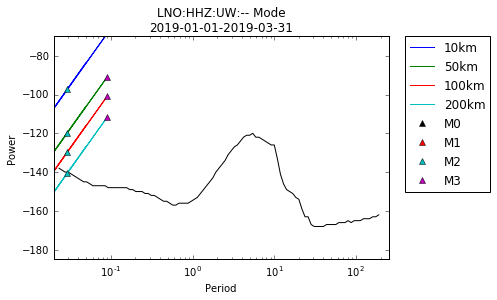

In [17]:
mag_curves = make_mag_curves(grid_lno)
print(mag_curves.keys())
scnl = grid_lno.origins[0].solutions[0].obj
freq = scnl.frequencies
period = [1/f for f in freq]
pow = [p for p in scnl.powers]
make_plot(mag_curves, name)

In [ ]:
Create a sparse grid with a station that only contributed to a few solutins (BOW2)

In [9]:
#BOW2,ENZ,UW,--,46.48,-123.23,100

lat_min = 46.081
lat_max = 52.481
lon_min = -124.231
lon_max = -116.231

name = 'bow2'
grid_type = 'detection'

src = {}
src[name] = data_srcs[name]
print(src)
%time grid_bow2 = make_grid(grid_type, src)
print(grid_bow2.get_path())

{'bow2': {'size': 0, 'klass': 'scnl', 'unit': 'deg', 'symbol': '', 'endtime': '2019-03-31', 'starttime': '2019-01-01', 'label': '', 'csv_path': 'csv/2019_eew/bow2.csv', 'color': 'k'}}
Profiling by noise...
lat: 47.031, 48.031, 49.031, 50.031, 51.031, 52.031, Feel the noise!
CPU times: user 11.3 s, sys: 58.5 ms, total: 11.4 s
Wall time: 11.4 s
/Users/joncon/Sites/magd_client//pickle_jar/bow2/detection_grid/128x160-res-0.05.pickle


dict_keys([0, 640, 130, 260, 790, 390, 520, 10, 140, 770, 270, 400, 530, 20, 750, 150, 280, 410, 540, 730, 30, 160, 290, 420, 710, 550, 40, 170, 300, 690, 430, 560, 50, 180, 670, 310, 440, 570, 60, 650, 190, 320, 800, 450, 580, 70, 200, 780, 330, 460, 590, 80, 760, 210, 340, 470, 600, 740, 90, 220, 350, 480, 720, 610, 100, 230, 360, 700, 490, 620, 110, 240, 680, 370, 500, 830, 630, 120, 660, 250, 380, 510])
dict_keys([0, 640, 130, 260, 790, 390, 520, 10, 140, 770, 270, 400, 530, 20, 750, 150, 280, 410, 540, 730, 30, 160, 290, 420, 710, 550, 40, 170, 300, 690, 430, 560, 50, 180, 670, 310, 440, 570, 60, 650, 190, 320, 800, 450, 580, 70, 200, 780, 330, 460, 590, 80, 760, 210, 340, 470, 600, 740, 90, 220, 350, 480, 720, 610, 100, 230, 360, 700, 490, 620, 110, 240, 680, 370, 500, 830, 630, 120, 660, 250, 380, 510])


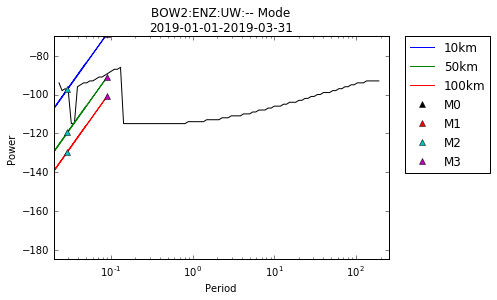

In [10]:

mag_curves = make_mag_curves(grid_bow2)
print(mag_curves.keys())
scnl = grid_bow2.origins[0].solutions[0].obj
freq = scnl.frequencies
period = [1/f for f in freq]
pow = [p for p in scnl.powers]
print(mag_curves.keys())
make_plot(mag_curves, name)